In [2]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [3]:
data = pd.read_csv('output/results_ensemble.csv', 
                   names = ['N', 'n_train', 'n_swap', 'd', 'balanced', 
                            'test_size', 'dev', 'accuracy', 'brier', 'seed'])

# data = data.loc[ data['N']==200 , : ]
# data = data.loc[ data['test_size']==0.1, : ]
# data = data.loc[ data['dev']!=0.15, : ]
# data = data.loc[ data['dev']!=0.25, : ]
# data = data.loc[ data['dev']==0.3, : ]
# data = data.loc[ data['d']!=1, : ]

ctrl_size = data.d.unique()
std_all = data.dev.unique()

In [15]:
data_mean =data.groupby(['d', 'dev']).mean()
data_std =data.groupby(['d', 'dev']).std()

data_mean

N  n_train  n_swap  test_size  accuracy     brier  seed
d dev                                                           
1 0.2  200        2       1        0.1      0.97  0.124549   413
  0.3  200        2       1        0.1      0.92  0.143688   413
  0.4  200        2       1        0.1      0.85  0.171470   413
2 0.2  200        4       1        0.1      0.98  0.122440   413
  0.3  200        4       1        0.1      0.92  0.143847   413
  0.4  200        4       1        0.1      0.81  0.168425   413
3 0.2  200        8       1        0.1      0.99  0.118293   413
  0.3  200        8       1        0.1      0.94  0.133943   413
  0.4  200        8       1        0.1      0.90  0.158836   413
4 0.2  200        8       1        0.1      1.00  0.119756   413
  0.3  200        8       1        0.1      0.96  0.137573   413
  0.4  200        8       1        0.1      0.87  0.165333   413

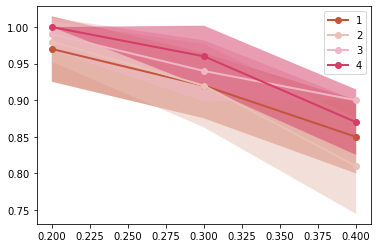

In [14]:
colors = sns.diverging_palette(20, 1, n=len(ctrl_size))

fig, ax = plt.subplots()

for d,c in zip(ctrl_size, colors):
    
    mean_data = data_mean.loc[[d]]
    std_data = data_std.loc[[d]]
    
    x = mean_data.index.levels[1]
    
    # Accuracy
    y_mean = mean_data.accuracy   
    y_std = std_data.accuracy
    lower = y_mean - y_std
    upper = y_mean + y_std

    ax.plot(x, y_mean, lw=2, label = str(d), color=c, marker='o')
    ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
    
    plt.legend()


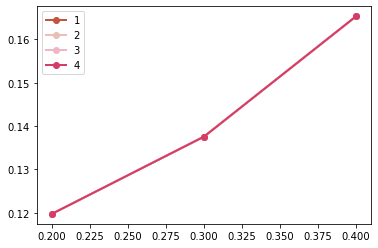

In [19]:
colors = sns.diverging_palette(20, 1, n=len(ctrl_size))

fig, ax = plt.subplots()

for d,c in zip(ctrl_size, colors):
        
    # Brier score
    y_mean = mean_data.brier
    y_std = std_data.brier
    lower = y_mean - y_std
    upper = y_mean + y_std

    ax.plot(x, y_mean, lw=2, label = str(d), color=c, marker='o')
    #ax.fill_between(x, upper, lower, facecolor=c, alpha=0.5)
plt.legend()


TypeError: unsupported operand type(s) for +: 'int' and 'str'

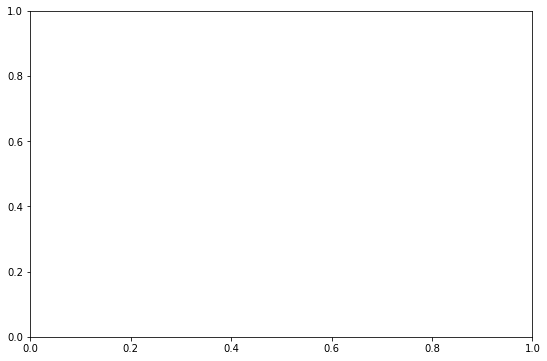

In [21]:
# Create a figure instance
fig = plt.figure(1, figsize=(9, 6))

# Create an axes instance
ax = fig.add_subplot(111)

# Create the boxplot
bp = ax.boxplot(data)

# Save the figure
fig.savefig('fig1.png', bbox_inches='tight')

In [26]:
data_std =data.groupby(['n_train', 'd', 'dev']).std()
data_std.accuracy

n_train  d  dev 
2        1  0.10    0.000000
            0.15    0.000000
            0.20    0.106066
            0.25    0.141421
            0.30    0.106066
4        2  0.10    0.000000
            0.15    0.070711
            0.20    0.085391
            0.25    0.125831
            0.30    0.085391
8        3  0.10    0.000000
            0.15    0.047871
            0.20    0.104083
            0.25    0.103078
            0.30    0.110868
         4  0.10    0.000000
            0.15    0.025000
            0.20    0.132288
            0.25    0.175594
            0.30    0.152753
Name: accuracy, dtype: float64

In [ ]:
d = data.d.unique()
B = data.B.unique()
std = [.05,.1, 15,.2, .25, .30]

In [ ]:
plt.plot(data.loc[data.dev==.1, 'd'], data.loc[data.dev==.1, 'accuracy'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.15, 'd'], data.loc[data.dev==.15, 'accuracy'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.2, 'd'], data.loc[data.dev==.2, 'accuracy'], color='orange', linewidth=3, marker='o', label='0.20')
plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'accuracy'], color='tomato', linewidth=2, marker='o',label="25")
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/accuracy.png', dpi=300)

In [ ]:
plt.plot(data.loc[data.dev==.1, 'd'], data.loc[data.dev==.1, 'brier'], color='skyblue',  linewidth=2, marker='o', label='0.10')
plt.plot(data.loc[data.dev==.15, 'd'], data.loc[data.dev==.15, 'brier'], color='green', linewidth=2, marker='o', label='0.15')
plt.plot(data.loc[data.dev==.2, 'd'], data.loc[data.dev==.2, 'brier'], color='orange', linewidth=3, marker='o', label='0.20')
plt.plot(data.loc[data.dev==.25, 'd'], data.loc[data.dev==.25, 'brier'], color='tomato', linewidth=2, marker='o',label="0.25")
plt.legend(loc=0)
plt.ylabel('Brier score')
plt.xlabel('d')
plt.xticks([1,2,3,4])
plt.grid(alpha=.3)
plt.savefig('output/brier_score.png', dpi=300)

In [64]:
import seaborn as sns

def plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='ensemble_performance.png'):
    
    # stds = np.array([0.10, .15, 0.20, .25, 0.30])
    colors = sns.diverging_palette(220, 10, n=5)

    fig, ax = plt.subplots(1)
    for i in np.arange(len(stds)):
        std= stds[i]
        color = colors[i]
        y = data.loc[data.dev==std, y_name]
        x = data.loc[data.dev==std, 'd']
        #plt.plot(x, y, color='blue',  linewidth=2)
        ax.plot(x,y, lw=2, label = std, color=color)
        # ax.fill_between(q, mean + upper, mean - lower, facecolor=color, alpha=0.5)
        # mean = ((1+ro[1]*(T-1))/T)*err
        # lower = mean - ((1+ro[0]*(T-1))/T)*err
        # upper = ((1 + ro[2] * (T - 1)) / T) * err - mean
        #ax.set_title(r'random walkers empirical $\mu$ and $\pm \sigma$ interval')
    ax.set_title('Quantum Bagging performance')
    ax.legend(loc='lower right', title = '$Std$')
    ax.set_xlabel('Number of control qubits ($d$)')
    ax.set_ylabel(y_name)
    ax.grid(alpha=0.3)
    ax.legend(bbox_to_anchor=(1.01, 1.05), title = '$Std$')
    plt.savefig('output/' + filename, dpi =300)
    plt.show()

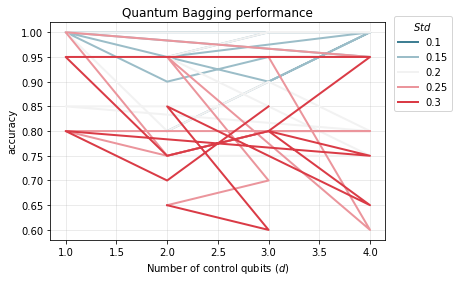

In [65]:
plot_ensemble_results(data, palette=[220,10], y_name='accuracy', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='acc_ensemble_performance.png')

In [ ]:
plot_ensemble_results(data, palette=[220,10], y_name='brier', 
                          stds = [0.10, .15, 0.20, .25, 0.30],
                          filename='brier_ensemble_performance.png')